
# Project: noshowappointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
1. What does age affect honouring appointments?
2. How does gender and receiving SMS affect the turn out?
3. How does  gender and  Age affect honouring appointments  affect turn out?

In [53]:
#importing packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Reading dataset from CSV file to upload it to the notebook

In [6]:
#Reading dataset from CSV file
df=pd.read_csv('noshowappointments.csv')


After loading the dataset let us asess the data content and distributrion in the dataset.

In [11]:
#Summary of the data and dtypes and try figure out if it is in order
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39596 entries, 0 to 39595
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       39596 non-null  float64
 1   AppointmentID   39596 non-null  int64  
 2   Gender          39596 non-null  object 
 3   ScheduledDay    39596 non-null  object 
 4   AppointmentDay  39596 non-null  object 
 5   Age             39596 non-null  float64
 6   Neighbourhood   39596 non-null  object 
 7   Scholarship     39596 non-null  int64  
 8   Hipertension    39596 non-null  int64  
 9   Diabetes        39596 non-null  int64  
 10  Alcoholism      39596 non-null  int64  
 11  Handcap         39596 non-null  int64  
 12  SMS_received    39596 non-null  int64  
 13  No_show         39596 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 4.2+ MB


The data does not contain any null value meaninng it is complete and does not require impute or drop significant rows that are not complete. The only problem that can be corrected is the data type of two fieds(ScheduledDay and AppointmentDay) cannot sit well in string thus need to be changed to day time to make sense to the data.

Assessing the content of the data both head and tail of the dataset.

In [12]:
#list first rows of data in the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#list last rows of data in the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
39591,2.659419e+13,5708974,F,2016-05-17 12:36:33,2016-05-19,50.0,SANTO ANDRÉ,0,1,0,0,0,0,No
39592,7.275113e+12,5648773,F,2016-05-02 16:31:03,2016-05-05,70.0,SANTO ANDRÉ,0,1,1,0,0,0,No
39593,5.132358e+13,5681879,M,2016-05-10 15:18:51,2016-05-12,50.0,SÃO PEDRO,0,0,0,1,0,0,No
39594,1.532652e+13,5681880,M,2016-05-10 15:19:04,2016-05-12,31.0,CARATOÍRA,0,0,0,0,0,0,Yes
39595,8.655847e+11,5681876,F,2016-05-10 15:18:39,2016-05-12,20.0,ITARARÉ,0,0,0,0,0,0,Yes


In [7]:
#Checking the number of columns present in a dataset
df.shape


(39596, 14)

Data has 110527 records(rows) each having 14 columns.  this means that 39596 patients were intented to show up for appointment in there specific day scheduled and the patient data recorded in the dataset had 14 attributes which each patient.

In [9]:
#used to give understanding of data distribution details in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,3.959600e+04,3.959600e+04,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000
mean,1.494770e+14,5.657555e+06,36.647363,0.098975,0.197697,0.068138,0.040484,0.021972,0.306319
std,2.585544e+14,6.165724e+04,22.473500,0.298632,0.398267,0.251986,0.197094,0.158673,0.460970
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.261006e+12,5.631433e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.155455e+13,5.664912e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.455414e+13,5.699628e+06,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999465e+14,5.754966e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


This explains statistical distriution of each attribute among all patients as guide on how to unddertand the data as one interacts with it. There is a notable error on the age attribute that it has a negative value which is never ideal and need corrected.

In [10]:
#Checking existence of null values in the dataset
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

Data had no null values in all the patients attributes indicating it is complete.

<a id='wrangling'></a>
## Data Wrangling


In [11]:
#rename the last column to avoid dash and replace with underscore.
df=df.rename(columns = {'No-show' : 'No_show'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39596 entries, 0 to 39595
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       39596 non-null  float64
 1   AppointmentID   39596 non-null  int64  
 2   Gender          39596 non-null  object 
 3   ScheduledDay    39596 non-null  object 
 4   AppointmentDay  39596 non-null  object 
 5   Age             39596 non-null  float64
 6   Neighbourhood   39596 non-null  object 
 7   Scholarship     39596 non-null  int64  
 8   Hipertension    39596 non-null  int64  
 9   Diabetes        39596 non-null  int64  
 10  Alcoholism      39596 non-null  int64  
 11  Handcap         39596 non-null  int64  
 12  SMS_received    39596 non-null  int64  
 13  No_show         39596 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 4.2+ MB


In [13]:
# check existence of ambigous age entry since nobody can have a negative age value
Agebelowzero =df.Age.min()
Agebelowzero

0.0


### Data Cleaning


Replaced all negative (-1) Ages entries out of range with mean  out of range since age cannot be negative

In [18]:
# Replaced all negative (-1) Ages entries out of range with mean  out of range

df["Age"].replace({-1 : df["Age"].mean()}, inplace=True)

Converting ScheduledDay and AppointmentDay from string to date-time for the readability

In [19]:
df['ScheduledDay']= df['ScheduledDay'].astype('datetime64[ns]')

In [20]:
df['AppointmentDay']= df['AppointmentDay'].astype('datetime64[ns]')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39596 entries, 0 to 39595
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       39596 non-null  float64
 1   AppointmentID   39596 non-null  int64  
 2   Gender          39596 non-null  object 
 3   ScheduledDay    39596 non-null  object 
 4   AppointmentDay  39596 non-null  object 
 5   Age             39596 non-null  float64
 6   Neighbourhood   39596 non-null  object 
 7   Scholarship     39596 non-null  int64  
 8   Hipertension    39596 non-null  int64  
 9   Diabetes        39596 non-null  int64  
 10  Alcoholism      39596 non-null  int64  
 11  Handcap         39596 non-null  int64  
 12  SMS_received    39596 non-null  int64  
 13  No_show         39596 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 4.2+ MB


In [42]:
df.to_csv('noshowappointments.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1: What does age  affect honouring appointments?


Grouping the patients in two groups of those who turned out for appointment(31457) and those did not turn up for the appointment.

In [24]:
#checking how many honoured appointment 
#noted: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

showedup = df.No_show == 'No'
print("showedup", showedup.sum())
Nevershowedup = df.No_show == 'Yes'
print("Nevershowedup", Nevershowedup.sum())

showedup 31457
Nevershowedup 8139


Text(0.5, 1.0, 'Age impact on showing up for Appointments')

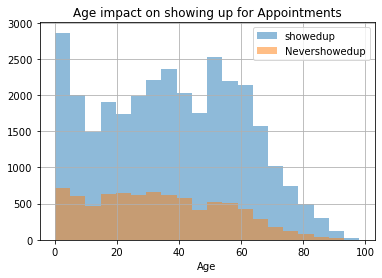

In [36]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# histogram showing relationship age to the number that honored appointment

df.Age[showedup].hist(alpha=0.5, bins=20, label='showedup')
df.Age[Nevershowedup].hist(alpha=0.5, bins=20, label='Nevershowedup',)
plt.legend();
plt.xlabel("Age")
plt.title('Age impact on showing up for Appointments')


The youngest honor appointments more than teens while the age are few and most of them honor appointments. The observation is that these young ages who honor appointments the most seem to either have a parental guide because at their age in most cases are under parental care.

### Research Question 2: How does  gender and receiving SMS affect the turn out?

the total population 39596
Total Females 25414
showedup females 20099
Never showedup females 5315
Total Males 25414
showedup males 11358
Never showedup males 2824


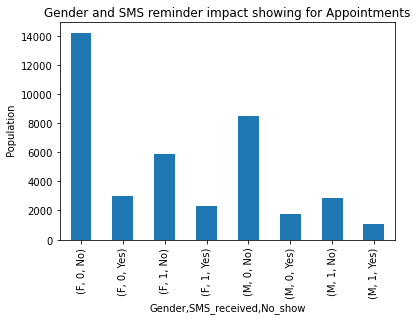

In [35]:
# histogram showing gender in relationship to the number that honored appointment
print("the total population",df.Gender.count())
#female Distribution
def all_females():
    females = df.Gender == 'F'
    return females

print('Total Females',all_females().sum())
show_females = df.Gender[showedup] == 'F'
print('showedup females',show_females.sum())
Never_show_females = df.Gender[Nevershowedup] == 'F'
print('Never showedup females',Never_show_females.sum())

#Males distribution
def all_males():
    males = df.Gender == 'F'
    return males
males = df.Gender == 'M'
print('Total Males',all_males().sum())
show_males = df.Gender[showedup] == 'M'
print('showedup males',show_males.sum())
Never_show_males = df.Gender[Nevershowedup] == 'M'
print('Never showedup males',Never_show_males.sum())
plt.ylabel(" Population")
df.groupby(['Gender','SMS_received','No_show']).Gender.count().plot(kind= 'bar', title='Gender and SMS reminder impact showing for Appointments');

From the graph above graph we can deduced that more females and males who did not received an sms reminder honored the appiointment than those received an sms reminder indiacting that an sms reminder has no impact in honoring appoint since most that received did not honor appointment.


### Research Question 3: How does  gender and  Age affect honouring appointments  affect turn out?

Gender  No_show
F       No         39.041196
        Yes        35.185701
M       No         34.553090
        Yes        30.783994
Name: Age, dtype: float64

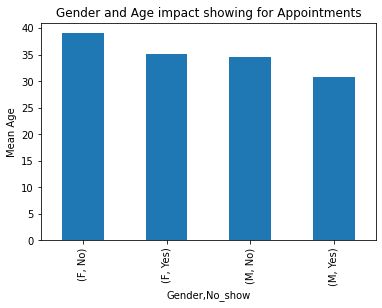

In [32]:

plt.ylabel("Mean Age")
df.groupby(['Gender','No_show']).Age.mean().plot(kind= 'bar',title='Gender and Age impact showing for Appointments');
df.groupby(['Gender','No_show']).mean().Age


The aged females tend to honour appointments more than males though the dataset did not include more aged males unlike the females the mean seem to be abit higher. 
More females who are not honoring appointment seem to be elder than the males who honour and those who do not homour the appointment.





## Assumptions
Assumptions made is that the negative age value I imputed with mean won't have much impact in my data as a way of cleaning my dataset.




## Limitations
  1. The dataset age data is not well distributed among the two gender in that in terms of grouping the females in relation honouring appointments data seems to have different means thus it is not leading to absolute comparison between the two genders hence I needed additional data that can adjust the mean to a comparable vale.
  2. The fact that sending a notification reminder to patients was not sufficient enough to ascertain that it did have impact since there is no additional information to validate the patient received the message and ignored the invite. I think the sms should have additional states of received,read,acknowledged so that it can have an impact on the follow why they ignored even the reminder.


<a id='conclusions'></a>
## Conclusions
1. This is a clear indication that age in this dataset in comparison with gender cannot be used to determine the honoring of appointment since it is not well distributed accross the two genders for ease of comparison.
2. Sending a reminder cannot be used to determine honoring of appointment.
3. Youngster tend to honour appointment than the aged though from the dataset there is less aged scheduled appointment.

References: Github,www.stackoveflow.com,www.geekforgeeks.com,https://www.programiz.com,https://www.statology.org/